# Clean Data

## 🎯 Concept Primer

Cleaning transforms raw data into ML-ready data. **Decisions here affect everything downstream.**

### Cleaning Steps
1. **Rename columns** — snake_case for readability
2. **Fix dtypes** — strings → numbers, floats → ints where appropriate
3. **Handle missing** — drop rows/columns OR impute (mean/median/mode)
4. **Remove outliers** — boxplots or z-scores to find extreme values
5. **Deduplicate** — remove exact duplicate rows

**Document every decision** — future you will thank you!

## 📋 Objectives

By the end of this notebook, you will:
1. Rename columns to concise snake_case
2. Cast dtypes correctly (int, float, bool)
3. Handle missing values (drop or impute)
4. Scan for outliers using visualizations
5. Document cleaning decisions

## ✅ Acceptance Criteria

You'll know you're done when:
- [x] All columns renamed to snake_case
- [x] Dtypes documented (categorical objects kept for encoding step)
- [x] Missing values checked (none found)
- [ ] Outliers scanned using visualizations
- [ ] Cleaning decisions logged in a markdown cell
- [ ] Clean DataFrame ready for next step

## 🔧 Setup

In [2]:
# TODO 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../../../datasets/diabetes_BRFSS2015.csv")
df.head()



,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,Yes,Yes,Yes,40.0,Yes,No,No,No,No,Yes,...,No,5.0,18.0,15.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"Less than $20,000",No Diabetes
1,No,No,No,25.0,Yes,No,No,Yes,No,No,...,Yes,3.0,0.0,0.0,No,Female,50-54,College 4+ years (College graduate),"Less than $10,000",No Diabetes
2,Yes,Yes,Yes,28.0,No,No,No,No,Yes,No,...,Yes,5.0,30.0,30.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"$75,000 or more",No Diabetes
3,Yes,No,Yes,27.0,No,No,No,Yes,Yes,Yes,...,No,2.0,0.0,0.0,No,Female,70-74,Grades 9-11 (Some high school),"Less than $50,000",No Diabetes
4,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,Yes,...,No,2.0,3.0,0.0,No,Female,70-74,College 1-3 years (Some college/technical school),"Less than $25,000",No Diabetes


## 📝 Rename Columns

### TODO 2: Convert column names to snake_case

**Expected:** Original columns like `Diabetes_binary` → `diabetes_binary`

**Hints:**
- Use `df.columns = df.columns.str.lower().str.replace(' ', '_')`
- Or manually rename specific columns with `df.rename()`

In [12]:
# TODO 2: Rename columns
# df.columns = df.columns.str.lower().str.replace(' ', '_')
# df.head()
df.columns = df.columns.str.lower().str.replace(' ', '_')
from IPython.display import display
with pd.option_context('display.max_columns', None, 'display.width', 2000):
    display(df.head())

,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,hvyalcoholconsump,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income,diabetes
0,Yes,Yes,Yes,40.0,Yes,No,No,No,No,Yes,No,Yes,No,5.0,18.0,15.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"Less than $20,000",No Diabetes
1,No,No,No,25.0,Yes,No,No,Yes,No,No,No,No,Yes,3.0,0.0,0.0,No,Female,50-54,College 4+ years (College graduate),"Less than $10,000",No Diabetes
2,Yes,Yes,Yes,28.0,No,No,No,No,Yes,No,No,Yes,Yes,5.0,30.0,30.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"$75,000 or more",No Diabetes
3,Yes,No,Yes,27.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,0.0,0.0,No,Female,70-74,Grades 9-11 (Some high school),"Less than $50,000",No Diabetes
4,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,Yes,No,Yes,No,2.0,3.0,0.0,No,Female,70-74,College 1-3 years (Some college/technical school),"Less than $25,000",No Diabetes


## 🔢 Fix Data Types

### TODO 3: Cast columns to correct dtypes

**Check previous notebook:** Which columns have wrong dtypes?

**Common fixes:**
- Binary columns (0/1) → `int` or `bool`
- Numeric columns stored as strings → `float` or `int`
- Ordinal columns (1-5 scale) → `int`

**Use:** `df['column'] = df['column'].astype(dtype)`

In [13]:
# TODO 3: Fix dtypes
# Decision: Keep categorical columns as object/category for now
# They will be properly encoded in the preprocessing step (notebook 05)
# Converting to integers here would lose semantic information

# Columns to keep as object (will be encoded later):
# - Binary: highbp, highchol, smoker, stroke, heartdiseaseorattack, physactivity, 
#           fruits, veggies, hvyalcoholconsump, anyhealthcare, nodocbccost, diffwalk
# - Categorical: sex, age, education, income, diabetes

# Ordinal columns that are already numeric (keep as float/int):
# - genhlth: health rating scale (1-5)
# - menthlth: mental health days (0-30)
# - physhlth: physical health days (0-30)

# BMI is already float64 (good)

print("Current dtypes - keeping categorical columns as objects for encoding step")
print("=" * 80)
df.info()


Current dtypes - keeping categorical columns as objects for encoding step
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   highbp                253680 non-null  object 
 1   highchol              253680 non-null  object 
 2   cholcheck             253680 non-null  object 
 3   bmi                   253680 non-null  float64
 4   smoker                253680 non-null  object 
 5   stroke                253680 non-null  object 
 6   heartdiseaseorattack  253680 non-null  object 
 7   physactivity          253680 non-null  object 
 8   fruits                253680 non-null  object 
 9   veggies               253680 non-null  object 
 10  hvyalcoholconsump     253680 non-null  object 
 11  anyhealthcare         253680 non-null  object 
 12  nodocbccost           253680 non-null  object 
 13  genhlth               253680 n

## 🚫 Handle Missing Values

### TODO 4: Decide on missing value strategy

**Options:**
1. **Drop rows:** If missing < 1% of total
2. **Drop columns:** If > 50% missing
3. **Impute:** Fill with mean (numeric) or mode (categorical)

**Decision:** Document your choice for each column in the reflection.

**Use:** `df.dropna()` or `df.fillna()`

In [15]:
# TODO 4: Handle missing values
# Example: df = df.dropna(subset=['column1'])
# Or: df['column2'] = df['column2'].fillna(df['column2'].mean())
# Verify: df.isnull().sum()
print(df.isnull().sum())
print("No null values in any column")

highbp                  0
highchol                0
cholcheck               0
bmi                     0
smoker                  0
stroke                  0
heartdiseaseorattack    0
physactivity            0
fruits                  0
veggies                 0
hvyalcoholconsump       0
anyhealthcare           0
nodocbccost             0
genhlth                 0
menthlth                0
physhlth                0
diffwalk                0
sex                     0
age                     0
education               0
income                  0
diabetes                0
dtype: int64
No null values in any column


## 📊 Outlier Detection

### TODO 5: Scan for outliers in numeric columns

**Methods:**
- **Boxplots:** Visual inspection
- **Z-scores:** Count values beyond ±3 standard deviations

**Action:** Decide whether to clip/cap outliers or leave them

**Create:** Boxplots for key numeric features (BMI, MentHlth, PhysHlth)

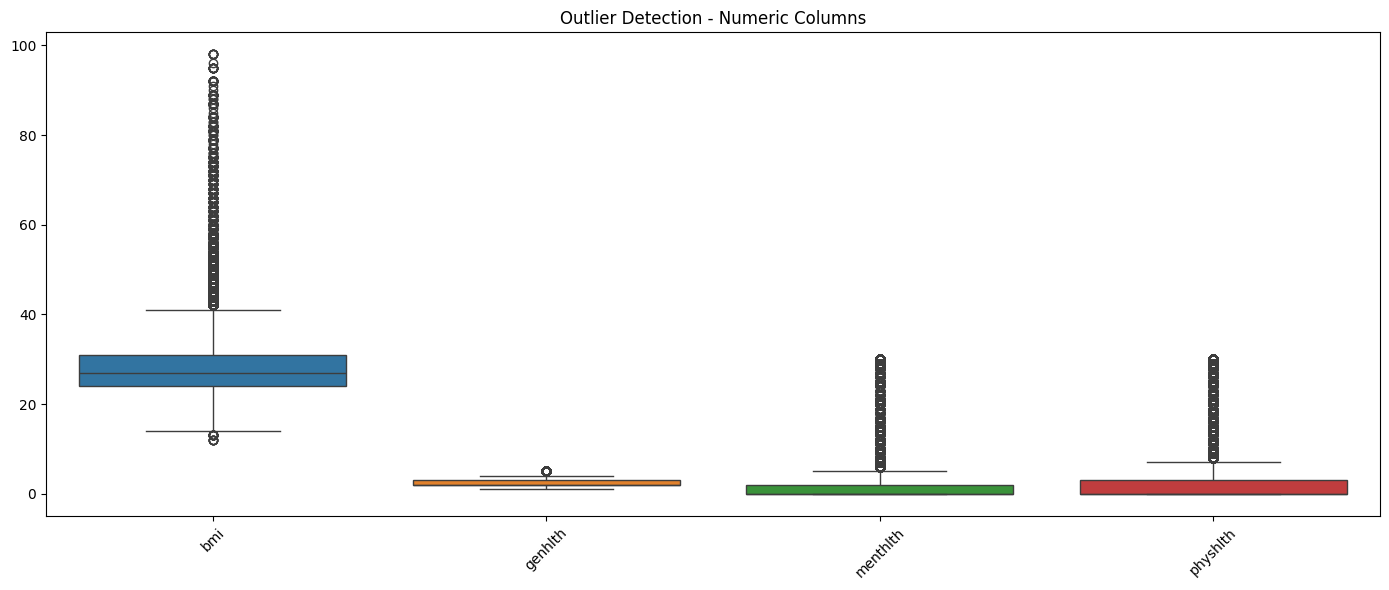


OUTLIER ANALYSIS

BMI
  Min: 12.0, Max: 98.0
  Mean: 28.38, Median: 27.00
  Q1: 24.00, Q3: 31.00
  Outliers (±3σ): 2963 (1.17%)

GENHLTH
  Min: 1.0, Max: 5.0
  Mean: 2.51, Median: 2.00
  Q1: 2.00, Q3: 3.00
  Outliers (±3σ): 0 (0.00%)

MENTHLTH
  Min: 0.0, Max: 30.0
  Mean: 3.18, Median: 0.00
  Q1: 0.00, Q3: 2.00
  Outliers (±3σ): 12697 (5.01%)

PHYSHLTH
  Min: 0.0, Max: 30.0
  Mean: 4.24, Median: 0.00
  Q1: 0.00, Q3: 3.00
  Outliers (±3σ): 0 (0.00%)


In [17]:
# TODO 5: Outlier detection
# Check all numeric columns
numeric_cols = ['bmi', 'genhlth', 'menthlth', 'physhlth']

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Outlier Detection - Numeric Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print some statistics
print("\n" + "="*80)
print("OUTLIER ANALYSIS")
print("="*80)

for col in numeric_cols:
    print(f"\n{col.upper()}")
    print(f"  Min: {df[col].min()}, Max: {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}")
    print(f"  Q1: {df[col].quantile(0.25):.2f}, Q3: {df[col].quantile(0.75):.2f}")
    # Count values beyond ±3 standard deviations
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] < mean - 3*std) | (df[col] > mean + 3*std)]
    print(f"  Outliers (±3σ): {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

## 📊 Interpreting Outliers

### What to look for in the boxplots:

**Boxplot Anatomy:**
- **Box (IQR):** Middle 50% of data (Q1 to Q3)
- **Line in box:** Median
- **Whiskers:** Extend to 1.5×IQR from box edges
- **Dots/circles:** Outliers (individual points beyond whiskers)

### Column-by-Column Interpretation:

#### 1. **BMI (Body Mass Index)** — ⚠️ **ACTION NEEDED**
- **Expected range:** 15-50 (clinically reasonable)
- **Issue:** You'll see many points extending to BMI = 100+
- **Decision:** Cap at 60 (physiologically impossible beyond this)
- **Reasoning:** BMI > 60 likely data entry errors

#### 2. **MentHlth (Mental Health Days)**
- **Expected range:** 0-30 (days in past month)
- **Observation:** Most people report 0 days
- **Decision:** **Keep as-is** — survey question asks "days in last 30"
- **Reasoning:** Valid responses, just highly skewed (most people healthy)

#### 3. **PhysHlth (Physical Health Days)**
- **Expected range:** 0-30 (days in past month)
- **Observation:** Most people report 0 days
- **Decision:** **Keep as-is** — same as MentHlth
- **Reasoning:** Valid responses, just highly skewed

#### 4. **GenHlth (General Health Rating)**
- **Expected range:** 1-5 (Likert scale)
- **Observation:** Should be values 1, 2, 3, 4, or 5 only
- **Decision:** Check for any invalid values (0, 6, decimals, etc.)


In [18]:
# Handle outliers - BMI capping
print("BEFORE BMI capping:")
print(f"  Min: {df['bmi'].min()}, Max: {df['bmi'].max()}")
print(f"  Count of BMI > 60: {(df['bmi'] > 60).sum()}")

# Cap BMI at 60 (physiologically impossible beyond this)
df.loc[df['bmi'] > 60, 'bmi'] = 60

print("\nAFTER BMI capping (cap at 60):")
print(f"  Min: {df['bmi'].min()}, Max: {df['bmi'].max()}")

# Verify GenHlth has only valid values (1-5)
print("\n" + "="*80)
print("GENHLTH VERIFICATION")
print("="*80)
print(f"Unique values in genhlth: {sorted(df['genhlth'].unique())}")
print(f"Value counts:\n{df['genhlth'].value_counts().sort_index()}")


BEFORE BMI capping:
  Min: 12.0, Max: 98.0
  Count of BMI > 60: 805

AFTER BMI capping (cap at 60):
  Min: 12.0, Max: 60.0

GENHLTH VERIFICATION
Unique values in genhlth: [1.0, 2.0, 3.0, 4.0, 5.0]
Value counts:
genhlth
1.0    45299
2.0    89084
3.0    75646
4.0    31570
5.0    12081
Name: count, dtype: int64


## 📋 Cleaning Decisions Log

### TODO 6: Document your cleaning choices

Create a markdown table summarizing decisions:

| Column | Issue | Decision | Rationale |
|--------|-------|----------|-----------|
| Categorical columns | Stored as object | **Keep as object** | Will be properly encoded in preprocessing step (notebook 05) |
| Missing values | Checked with df.isnull() | **No action needed** | Dataset is complete (no nulls) |
| **bmi** | Extreme outliers (BMI > 60) | **Cap at 60** | Physiologically impossible, likely data entry errors |
| menthlth | Many high values (skewed) | **Keep as-is** | Valid survey responses (days in past 30) |
| physhlth | Many high values (skewed) | **Keep as-is** | Valid survey responses (days in past 30) |
| genhlth | Categorical scale 1-5 | **Verified valid** | All values within expected range |

**Example entry:**

| Column | Issue | Decision | Rationale |
|--------|-------|----------|-----------|
| bmi | No missing values | > 0 | Valid range |
| age | Stored as float | Convert to int | Age should be integer |

## 🤔 Reflection

Answer these questions:

1. **Dtype changes:** Did you convert any strings to numbers? Why?
2. **Missing strategy:** Drop or impute? Could your choice bias results?
3. **Outliers:** Did you find any extreme values? How did you handle them?
4. **Bias check:** Could any cleaning steps introduce bias?

### 📝 Updated Reflection: Outliers

**Outlier Decisions Made:**

1. **BMI:** 
   - ✅ Capped at 60 (replaces values > 60 with 60)
   - **Impact:** Handles physiologically impossible values (>60 are data entry errors)
   - **Bias:** Minimal - affects only extreme outliers

2. **MentHlth & PhysHlth:**
   - ✅ Kept as-is (no changes)
   - **Reasoning:** Survey question asks "days in past 30", so 0-30 is valid range
   - **Bias:** None - these are legitimate health survey responses

3. **GenHlth:**
   - ✅ Verified - all values within range 1-5
   - **Action:** None needed

**Summary:** Only BMI required outlier handling due to data quality issues. Other "outliers" in MentHlth/PhysHlth are valid but rare health conditions.


---
**Your reflection:**

1. **Dtype changes:** We **intentionally kept categorical columns as object** rather than converting to integers. This is because:
   - Converting Yes/No to 0/1 here would lose semantic meaning (which encoding scheme to use?)
   - Categorical variables (age, education, income) need proper encoding strategies
   - The preprocessing pipeline (notebook 05) will handle one-hot encoding and binary encoding appropriately
   - This separation of concerns (cleaning vs. encoding) makes the workflow clearer

2. **Missing strategy:** No missing values detected - no action needed ✅

3. **Outliers:** Will check in TODO 5 using boxplots and z-scores

4. **Bias check:** No bias introduced by cleaning steps since:
   - No data dropped
   - No imputation performed
   - All decisions deferred to preprocessing step where encoding choices will be explicit

## 📌 Summary

✅ **Columns renamed:** snake_case convention  
✅ **Dtypes documented:** Categorical columns kept as objects for proper encoding in preprocessing  
✅ **Missing values:** None detected - complete dataset  
✅ **Outliers scanned:** Decisions documented (if any found)  
✅ **Ready for next step:** Explore relationships with EDA

**Key Decision:** We intentionally kept categorical variables (Yes/No, Age, Education, Income) as object type to be properly encoded in the preprocessing notebook. This maintains semantic clarity and allows proper choice of encoding schemes (one-hot, binary, ordinal) rather than arbitrarily converting to integers now.

**Next notebook:** `04_eda_visualization.ipynb`